In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from wordcloud import WordCloud

In [4]:
dataset = pd.read_csv("PlanillaC.csv",sep=';')

In [5]:
dataset.head()

,nombre,apellido,genero,posicion,cedula,cargo,codigoCargo,salarioMensual,sobresueldo,inicioLaboral,objetoGastos,estatus
0,AARON JOSUE,MEDINA,M,43192.0,8-0919-00412,ESTADISTICO CENSAL I,41091.0,700.0,0.0,01/08/2023,2.0,EVENTUAL
1,ABDEL,BATISTA,M,4591.0,9-0712-01688,CONDUCTOR DE VEHICULO I,6034011.0,837.0,0.0,17/10/2011,1.0,PERMANENTE
2,ABDEL JABBAR,ARCIA,M,6053.0,8-0806-01206,AUDITOR FISCAL III,55023.0,1198.0,0.0,04/05/2022,1.0,PERMANENTE
3,ABDIEL,ESPINOSA,M,4785.0,9-0731-00875,ESTADISTICO II,41022.0,1548.0,0.0,16/04/2013,1.0,PERMANENTE
4,ABDIEL,OLIVARDIA,M,38112.0,8-0718-01099,TECNICO EN REPARACION DE EQUIPO DE COMUNICACI...,6012310.0,1300.0,0.0,03/01/2023,2.0,EVENTUAL


In [7]:
print(dataset.columns)

Index(['nombre', 'apellido', 'genero', 'posicion', 'cedula', 'cargo',
       'codigoCargo', 'salarioMensual', 'sobresueldo', 'inicioLaboral',
       'objetoGastos', 'estatus'],
      dtype='object')


In [8]:
print(dataset.dtypes)

nombre             object
apellido           object
genero             object
posicion          float64
cedula             object
cargo              object
codigoCargo       float64
salarioMensual    float64
sobresueldo       float64
inicioLaboral      object
objetoGastos      float64
estatus            object
dtype: object


In [9]:
dataset.values

array([['AARON JOSUE         ', 'MEDINA         ', 'M', ...,
        '01/08/2023', 2.0, 'EVENTUAL'],
       ['ABDEL               ', 'BATISTA        ', 'M', ...,
        '17/10/2011', 1.0, 'PERMANENTE'],
       ['ABDEL JABBAR        ', 'ARCIA          ', 'M', ...,
        '04/05/2022', 1.0, 'PERMANENTE'],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=object)

In [10]:
dataset.axes

[RangeIndex(start=0, stop=4838, step=1),
 Index(['nombre', 'apellido', 'genero', 'posicion', 'cedula', 'cargo',
        'codigoCargo', 'salarioMensual', 'sobresueldo', 'inicioLaboral',
        'objetoGastos', 'estatus'],
       dtype='object')]

In [14]:
print(dataset.ndim)
print(dataset.size)
print(dataset.shape)

2
58056
(4838, 12)


In [15]:
dataset.at[4,'apellido']

'OLIVARDIA      '

In [16]:
dataset.loc[4]

nombre                                         ABDIEL              
apellido                                            OLIVARDIA      
genero                                                            M
posicion                                                    38112.0
cedula                                                 8-0718-01099
cargo             TECNICO EN REPARACION DE EQUIPO DE  COMUNICACI...
codigoCargo                                               6012310.0
salarioMensual                                               1300.0
sobresueldo                                                     0.0
inicioLaboral                                            03/01/2023
objetoGastos                                                    2.0
estatus                                                    EVENTUAL
Name: 4, dtype: object

In [17]:
dataset.loc[(dataset['salarioMensual']>1700)]

,nombre,apellido,genero,posicion,cedula,cargo,codigoCargo,salarioMensual,sobresueldo,inicioLaboral,objetoGastos,estatus
6,ABDIEL A,SOTO M,M,1258.0,8-0498-00271,ANALISTA DEL SISTEMA DE CONTABILIDAD GUBERNAME...,52012.0,1844.00,0.0,21/02/1995,1.0,PERMANENTE
10,ABDIEL E,ROMERO,M,497.0,8-0480-00091,JEFE DE AUDITORIA DE CONTRALORIA II (EXTERNA),54052.0,1815.00,0.0,02/02/2015,1.0,PERMANENTE
31,ABRAHAM,MUNIZ,M,3729.0,8-0713-02154,CONTADOR III (SUPERVISOR),51023.0,2102.00,0.0,24/03/2011,1.0,PERMANENTE
38,ADALBERTO B,RIVERA,M,3638.0,9-0197-00413,AUDITOR III (SUPERVISOR),54023.0,1896.00,0.0,01/11/2012,1.0,PERMANENTE
39,ADAN,VELASQUEZ,M,5004.0,8-0511-00138,AUDITOR III (SUPERVISOR),54023.0,2125.00,0.0,25/03/2002,1.0,PERMANENTE
...,...,...,...,...,...,...,...,...,...,...,...,...
4748,ZULEICA,AGRAZAL C,F,1325.0,8-0240-00558,AUDITOR FISCAL SUPERVISOR,55050.0,1944.63,0.0,11/07/1983,1.0,PERMANENTE
4749,ZULEIKA,GUARDIA,F,2684.0,8-0397-00416,ANALISTA DE RECURSOS HUMANOS,36052.0,1773.00,0.0,22/05/2009,1.0,PERMANENTE
4754,ZULEIKA EDITH,PRADO,F,242.0,8-0297-00453,ASISTENTE EJECUTIVO II,17032.0,3564.00,0.0,16/01/2020,1.0,PERMANENTE
4760,ZULLY M,CASTILLO,F,3575.0,8-0516-01609,AUDITOR II,54022.0,1932.00,0.0,03/02/2016,1.0,PERMANENTE


In [20]:
dataset=dataset.dropna()

In [22]:
print(dataset.values)
print(dataset.shape)

[['AARON JOSUE         ' 'MEDINA         ' 'M' ... '01/08/2023' 2.0
  'EVENTUAL']
 ['ABDEL               ' 'BATISTA        ' 'M' ... '17/10/2011' 1.0
  'PERMANENTE']
 ['ABDEL JABBAR        ' 'ARCIA          ' 'M' ... '04/05/2022' 1.0
  'PERMANENTE']
 ...
 ['ZUNELDA E           ' 'MOORE          ' 'F' ... '16/02/2012' 1.0
  'PERMANENTE']
 ['ZURISADAI S         ' 'TREJOS         ' 'F' ... '16/09/2014' 1.0
  'PERMANENTE']
 ['ZURISADAY B         ' 'VILLARRETA     ' 'F' ... '01/09/2010' 1.0
  'PERMANENTE']]
(4765, 12)


([<matplotlib.axis.XTick at 0x18e83e563d0>,
 [Text(0, 0, 'Mujer'), Text(1, 0, 'hombre')])

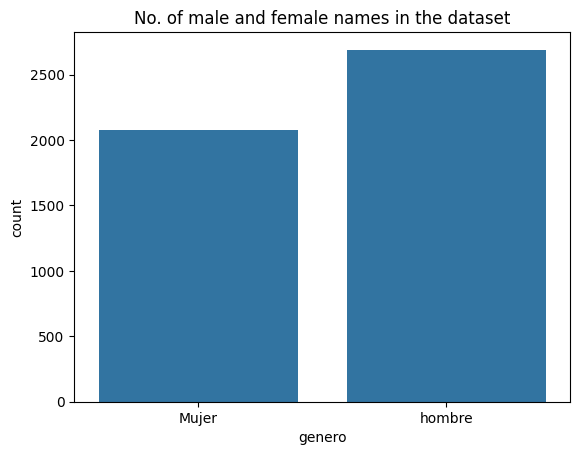

In [23]:
sns.countplot(x='genero',data=dataset)
plt.title('No. of male and female names in the dataset')
plt.xticks([0,1],('Mujer','hombre'))